<a href="https://colab.research.google.com/github/ehdob-cid20/mlops-deploy/blob/main/CDN_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Health Insurance Cross Sell Prediction - Kaggle</strong></h1>

<h3><strong>Data Science for Business</strong></h3>

**Goal**:
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

*   Dataset: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

***Teacher:*** Marcio Palheta Piedade

***Group:*** Dilmara Ferreira, Edson Brilhante, Cássio de Paula e Paulo Moraes

<h4><strong>Melhores Modelos</strong></h4>



*   Logistic Regression
*   Random Florest
*   XGBoost



<h4><strong>Campos/Conceito</strong></h4>

Total de 12 campos, sendo nenhum nulo, 3 categoricos  e 9 númericos.

*  id - Unique ID for the customer
*  Gender - Gender of the customer
*  Age - Age of the customer
*  Driving_License - 0 : Customer does not have DL, 1 : Customer already has DL
*  Region_Code -  Unique code for the region of the customer
*  Previously_Insured - 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
*  Vehicle_Age - Age of the Vehiclevy  
*  Vehicle_Damage - 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
*  Annual_Premium - The amount customer needs to pay as premium in the year
*  PolicySalesChannel - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
*  Vintage - Number of Days, Customer has been associated with the company.
*  Response - 1 : Customer is interested, 0 : Customer is not interested

# 1. Importando Bibliotecas

In [ ]:
!pip install shap 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, SCORERS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
pd.options.display.max_columns = None

In [ ]:
sns.set(font_scale=1.2)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

#2. Carregando Dados

In [ ]:
df_train = pd.read_csv('train.csv', sep=',')
df_train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


#3. Análise Exploratoria

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
print("Tamanho dataset treino: ", df_train.shape)

Tamanho dataset treino:  (381109, 12)


In [ ]:
#Princiapis categorias
categoricals = df_train.select_dtypes(exclude=[np.number])
categoricals.describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [ ]:
#Categorias por variavel
n = categoricals
for c in n.columns:
    print('{:<14}'.format(c), df_train[c].unique())

Gender         ['Male' 'Female']
Vehicle_Age    ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']


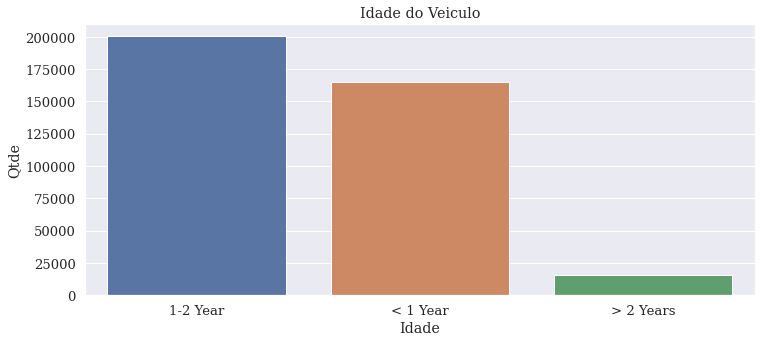

In [ ]:
plt.figure(figsize = (12,5))

ax = sns.countplot(x = 'Vehicle_Age', 
                   data = df_train, 
                   order = df_train['Vehicle_Age'].value_counts().index)

ax.set_title('Idade do Veiculo')
ax.set_xlabel('Idade')
ax.set_ylabel('Qtde')

plt.show()

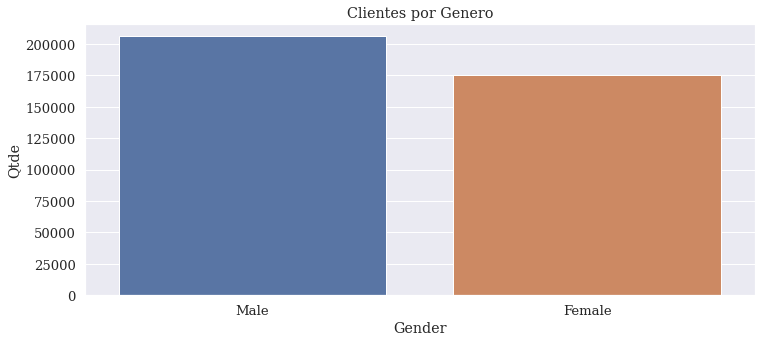

In [ ]:
plt.figure(figsize = (12,5))

ax = sns.countplot(x = 'Gender', 
                   data = df_train, 
                   order = df_train['Gender'].value_counts().index)

ax.set_title('Clientes por Genero')
ax.set_xlabel('Gender')
ax.set_ylabel('Qtde')

plt.show()

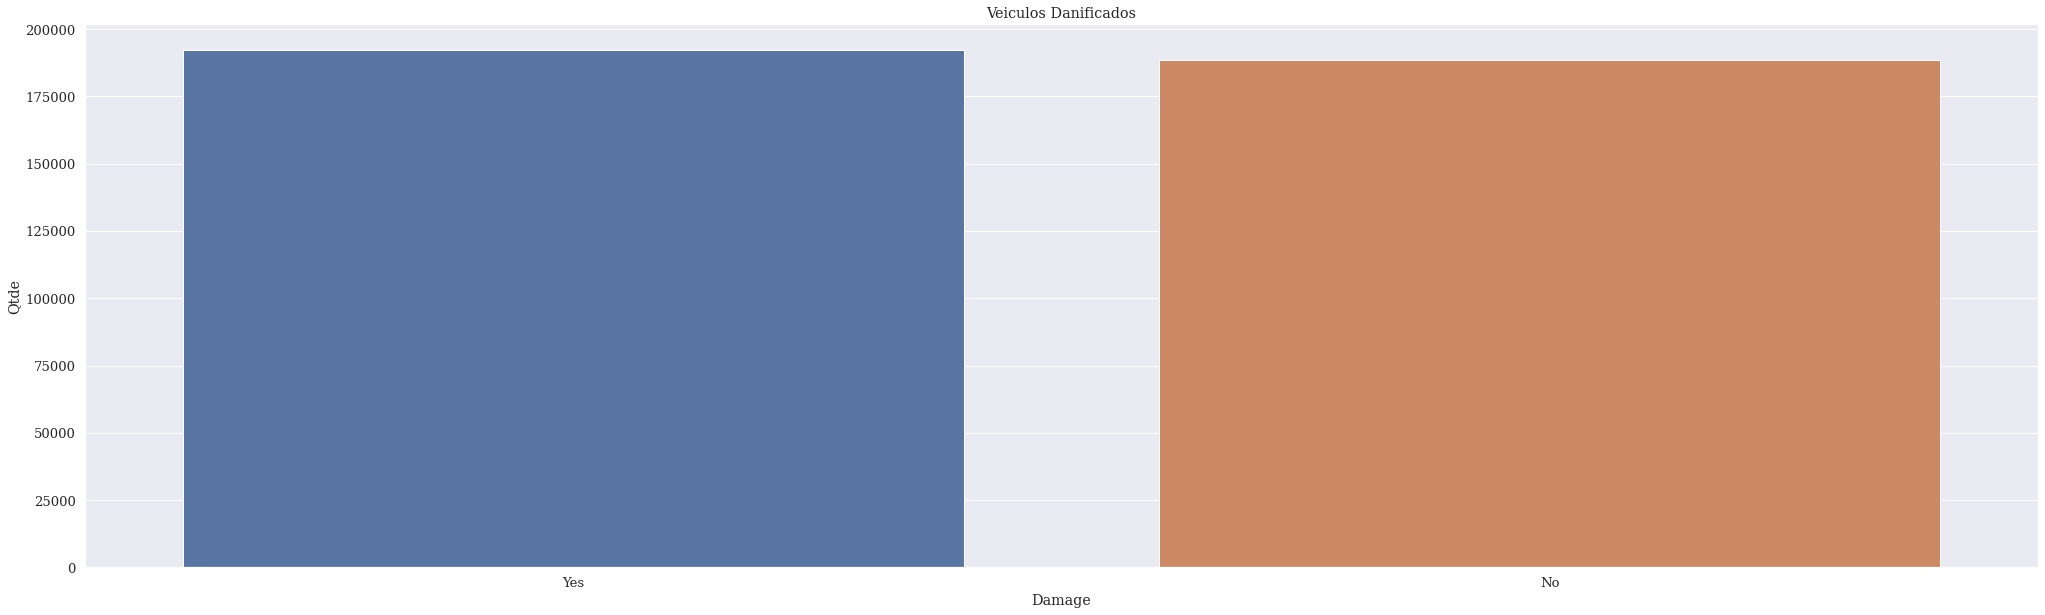

In [ ]:
plt.figure(figsize = (35,10))

ax = sns.countplot(x = 'Vehicle_Damage', 
                   data = df_train, 
                   order = df_train['Vehicle_Damage'].value_counts().index)

ax.set_title('Veiculos Danificados')
ax.set_xlabel('Damage')
ax.set_ylabel('Qtde')

plt.show()

In [ ]:
df_train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
null_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
null_data.head(20)

,Total,Percent
Response,0,0.0
Vintage,0,0.0
Policy_Sales_Channel,0,0.0
Annual_Premium,0,0.0
Vehicle_Damage,0,0.0
Vehicle_Age,0,0.0
Previously_Insured,0,0.0
Region_Code,0,0.0
Driving_License,0,0.0
Age,0,0.0


In [ ]:
correlacao = df_train.corr()
correlacao

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


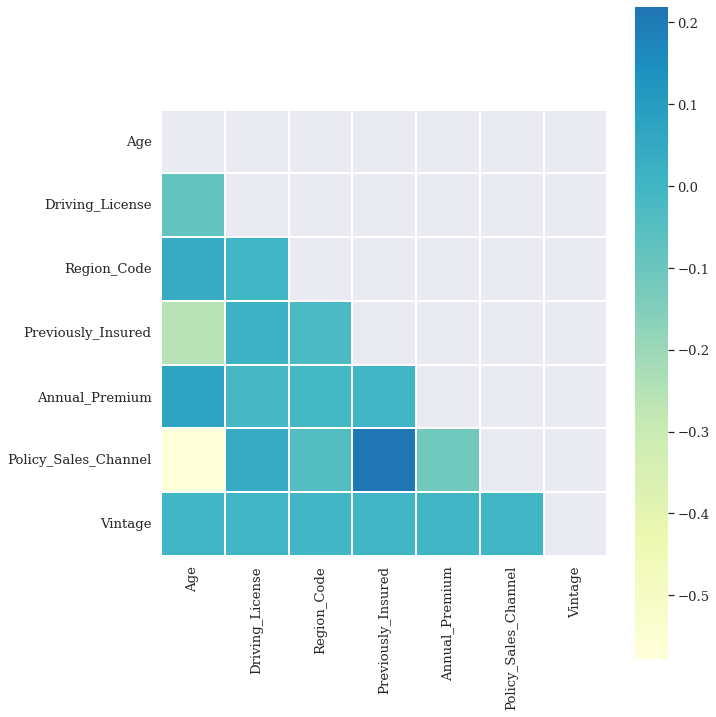

In [ ]:
fet_set = df_train.drop(labels=['id','Response'],axis=1)
def plot_diag_heatmap(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(10, 12))
    sns.heatmap(corr, mask=mask, cmap='YlGnBu', center=0,square=True, linewidths=1, cbar_kws={"shrink": 1.0})
plot_diag_heatmap(fet_set)

#4. Pré-processamento

In [ ]:
#Removendo campo
df_train.drop(['id'], axis='columns', inplace=True)

In [ ]:
df_train.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [ ]:
#Convertendo string em numeros
label_encoder = LabelEncoder()
df_train['Gender'] = label_encoder.fit_transform(list(df_train['Gender'].values))
df_train['Vehicle_Age'] = label_encoder.fit_transform(list(df_train['Vehicle_Age'].values))
df_train['Vehicle_Damage'] = label_encoder.fit_transform(list(df_train['Vehicle_Damage'].values))


In [ ]:
df_train.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0


In [ ]:
X = df_train.loc[:,'Gender':'Vintage'].to_numpy()
y = df_train['Response'].to_numpy()

In [ ]:
X

array([[1.0000e+00, 4.4000e+01, 1.0000e+00, ..., 4.0454e+04, 2.6000e+01,
        2.1700e+02],
       [1.0000e+00, 7.6000e+01, 1.0000e+00, ..., 3.3536e+04, 2.6000e+01,
        1.8300e+02],
       [1.0000e+00, 4.7000e+01, 1.0000e+00, ..., 3.8294e+04, 2.6000e+01,
        2.7000e+01],
       ...,
       [1.0000e+00, 2.1000e+01, 1.0000e+00, ..., 3.5118e+04, 1.6000e+02,
        1.6100e+02],
       [0.0000e+00, 6.8000e+01, 1.0000e+00, ..., 4.4617e+04, 1.2400e+02,
        7.4000e+01],
       [1.0000e+00, 4.6000e+01, 1.0000e+00, ..., 4.1777e+04, 2.6000e+01,
        2.3700e+02]])

In [ ]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
target_names = ["Não","Sim"]

##4.1 Dividindo Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    stratify = y,
                                                    test_size=0.20, 
                                                    random_state=0)

In [ ]:
# Normalizando os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.08552087,  0.39830382,  0.04696456, ...,  0.46718414,
         0.22028064, -0.50556932],
       [ 0.92121674, -1.0203265 ,  0.04696456, ...,  0.11318043,
         0.73705718, -0.27863263],
       [-1.08552087,  0.33382062,  0.04696456, ..., -0.3171016 ,
        -1.58843725,  0.17524074],
       ...,
       [ 0.92121674,  1.17210218,  0.04696456, ...,  0.31754109,
        -1.58843725,  1.35770033],
       [-1.08552087, -0.9558433 ,  0.04696456, ..., -0.32945531,
         0.71860088, -0.62500969],
       [ 0.92121674, -0.9558433 ,  0.04696456, ...,  0.14453089,
         0.73705718,  1.66824527]])

In [ ]:
X_test

array([[-1.08552087, -0.82687691,  0.04696456, ...,  0.40628968,
         0.73705718,  0.73661045],
       [-1.08552087, -1.08480969,  0.04696456, ..., -0.18505676,
         0.73705718, -0.97138674],
       [-1.08552087,  0.20485423,  0.04696456, ..., -1.6272358 ,
        -1.58843725, -0.74445005],
       ...,
       [ 0.92121674,  0.39830382,  0.04696456, ...,  0.64765319,
         0.18336803,  0.65300219],
       [-1.08552087, -1.08480969,  0.04696456, ...,  0.19616007,
         0.73705718,  0.87993888],
       [ 0.92121674,  1.55900136,  0.04696456, ...,  0.68914301,
         0.22028064, -1.6521968 ]])

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

Amostras de treino:
 * X_train: (304887, 10)
 * y_train: (304887,)
Amostras de teste:
 * X_test: (76222, 10)
 * y_test: (76222,)


#5. KNN

##5.1 Treino Modelo

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=25)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

## 5.2 Avaliando Modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, knn_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Treino): 0.88
Acurácia (Teste): 0.87


In [ ]:
print(classification_report(y_test, knn_model.predict(X_test), target_names=['Não', 'Sim']))

              precision    recall  f1-score   support

         Não       0.88      0.99      0.93     66880
         Sim       0.38      0.05      0.09      9342

    accuracy                           0.87     76222
   macro avg       0.63      0.52      0.51     76222
weighted avg       0.82      0.87      0.83     76222



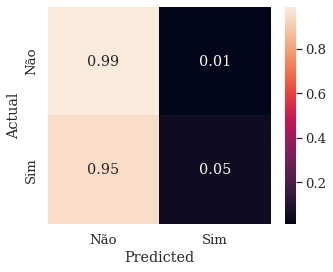

In [ ]:
cm = confusion_matrix(y_test, knn_model.predict(X_test), labels=knn_model.classes_)
# Normalise
cmn = cm.astype('float') /  cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

#6. Árvore de Decisão

##6.1 Treinando Modelo

In [ ]:
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=10,
                                    random_state=0)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

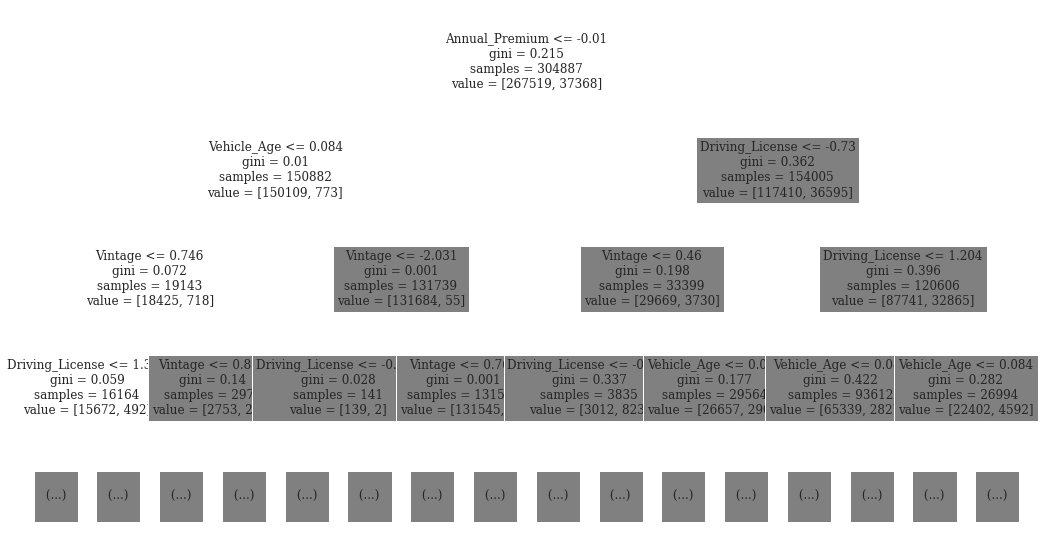

In [ ]:
plt.figure(figsize=(18,10))

ax = plot_tree(tree_model,
               max_depth=3,
               fontsize=12,
               feature_names=df_train.columns[1:])

plt.show()

## 6.2 Avaliando Modelo

In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, tree_model.predict(X_train)), 2)}')
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Treino): 0.88
Acurácia (Teste): 0.88


In [ ]:
print(classification_report(y_test, tree_model.predict(X_test), target_names=['Não', 'Sim']))

              precision    recall  f1-score   support

         Não       0.88      1.00      0.93     66880
         Sim       0.34      0.01      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.61      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



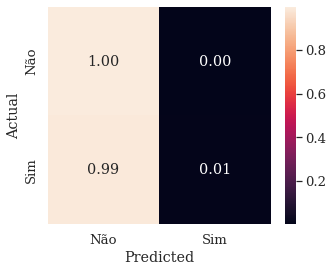

In [ ]:
cm = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)
# Normalise
cmn = cm.astype('float') /  cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

#7. Regressão Logística

##7.1 Treino Modelo

In [ ]:
reglog_model = SGDClassifier(loss='log', 
                             learning_rate='constant', 
                             max_iter=250,
                             eta0=0.05, 
                             verbose=1, 
                             tol=None, 
                             random_state=0)

reglog_model.fit(X_train, y_train)

-- Epoch 1
Norm: 2.41, NNZs: 10, Bias: -4.251311, T: 304887, Avg. loss: 0.294061
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 2.40, NNZs: 10, Bias: -3.866969, T: 609774, Avg. loss: 0.294191
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 2.50, NNZs: 10, Bias: -4.047614, T: 914661, Avg. loss: 0.294011
Total training time: 0.27 seconds.
-- Epoch 4
Norm: 2.27, NNZs: 10, Bias: -4.219268, T: 1219548, Avg. loss: 0.293863
Total training time: 0.36 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 10, Bias: -4.267394, T: 1524435, Avg. loss: 0.293987
Total training time: 0.45 seconds.
-- Epoch 6
Norm: 2.24, NNZs: 10, Bias: -3.989412, T: 1829322, Avg. loss: 0.293801
Total training time: 0.54 seconds.
-- Epoch 7
Norm: 2.32, NNZs: 10, Bias: -3.772208, T: 2134209, Avg. loss: 0.294073
Total training time: 0.63 seconds.
-- Epoch 8
Norm: 2.41, NNZs: 10, Bias: -4.137564, T: 2439096, Avg. loss: 0.294050
Total training time: 0.72 seconds.
-- Epoch 9
Norm: 2.60, NNZs: 10, Bias: -3.966937, T: 2743983, Avg. 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.05, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=250,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=1, warm_start=False)

##7.2 Avaliando Modelo

In [ ]:
for f, c in zip(df_train.columns[1:], reglog_model.coef_[0].tolist()):
    print(f'{f} = {c}')

print(f'CONST = {float(reglog_model.intercept_)}')

Age = 0.15380118174017898
Driving_License = -0.018563130095055683
Region_Code = 0.29474261776306765
Previously_Insured = -0.02246074015132885
Vehicle_Age = -1.940621367327331
Vehicle_Damage = -0.4121165174932702
Annual_Premium = 1.072930778900923
Policy_Sales_Channel = -0.021772883657645292
Vintage = -0.1840606301310812
Response = 0.14391038678560436
CONST = -4.043475429754126


In [ ]:
print(f'Acurácia (Treino): {round(accuracy_score(y_train, reglog_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.88


In [ ]:
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.88


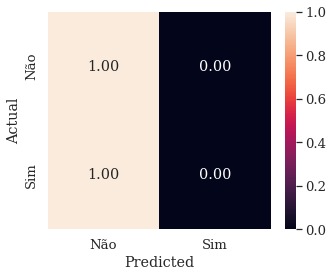

In [ ]:
cm = confusion_matrix(y_test, reglog_model.predict(X_test), labels=reglog_model.classes_)
# Normalise
cmn = cm.astype('float') /  cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

#8. Random Forest

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=50, 
                                             criterion='entropy',
                                             max_depth=10,
                                             min_samples_split=2,
                                             random_state=0)


In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print('Random Forest')
print(f'Acurácia: {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 4)}')

Random Forest
Acurácia: 0.8774


In [ ]:
print(classification_report(y_test, random_forest_model.predict(X_test), target_names=['Não', 'Sim']))

              precision    recall  f1-score   support

         Não       0.88      1.00      0.93     66880
         Sim       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


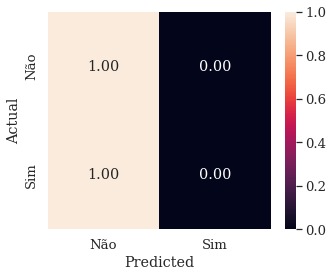

In [ ]:
cm = confusion_matrix(y_test, random_forest_model.predict(X_test), labels=random_forest_model.classes_)
# Normalise
cmn = cm.astype('float') /  cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

#9. XGBoost

In [ ]:
%%capture

xgb_model = xgboost.XGBClassifier(booster = 'gbtree', 
                                  learning_rate = 0.03,
                                  n_estimators = 100,
                                  max_depth = 3, 
                                  use_label_encoder=False)

cv = KFold(n_splits = 5, 
           shuffle = True, 
           random_state=0)

n_scores = cross_val_score(xgb_model, 
                           X_train, y_train, 
                           scoring = 'accuracy', 
                           cv = cv)

In [ ]:
print('Validação Cruzada\n')
print(f'Acurácias: {n_scores}\n')
print(f'Acurácias (média): {round(np.mean(n_scores), 4)}')
print(f'Acurácias (desvio padrão): {round(np.std(n_scores), 4)}')

Validação Cruzada

Acurácias: [0.87629965 0.87921873 0.87619922 0.87778999 0.87767519]

Acurácias (média): 0.8774
Acurácias (desvio padrão): 0.0011


In [ ]:
%%capture

xgb_model.fit(X_train, y_train)

In [ ]:
print('XGBoost')
print(f'Acurácia: {round(accuracy_score(y_test, xgb_model.predict(X_test)), 4)}')

XGBoost
Acurácia: 0.8774


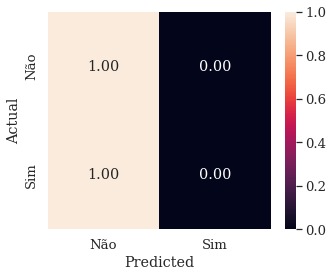

In [ ]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test), labels=xgb_model.classes_)
# Normalise
cmn = cm.astype('float') /  cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)